In [1]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn.model_selection


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

Completed.


In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
columns_to_drop = ['car_ID', 'CarName']

In [6]:
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df['doornumber'].replace({'two': 2, 'four': 4}, inplace=True)
df['cylindernumber'].replace({'two': 2, 'three': 3, 'four': 4, 'five':5, 'six': 6, 'eight': 8, 'twelve': 12}, inplace=True)

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
df_encoded.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,False,True,False,False,False,False,False,True,False,False
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,False,False,False,False,False,False,False,True,False,False


In [10]:
# Exemplo: Se 'price' fosse a variável alvo (target)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']  # Altere isso se a variável alvo for diferente

In [11]:
#Realziando a separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (164, 38)
y_train:  (164,)
---
X_test:  (41, 38)
y_test:  (41,)


In [12]:
#Definindo modelo de Regressão Linear
logistic_model = LinearRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

In [13]:
#R2 Score  
r2 = r2_score(y_test, y_pred)

r2

0.8150188994330948

In [14]:
# Supondo que você tenha y_test como os valores reais
 # Calcula a média dos valores reais

# Calcula a Soma dos Quadrados Totais (SST)
SST = np.sum((y_test - y_pred) ** 2)

print("Soma dos Quadrados Totais (SST):", SST)

Soma dos Quadrados Totais (SST): 237482218.69425553


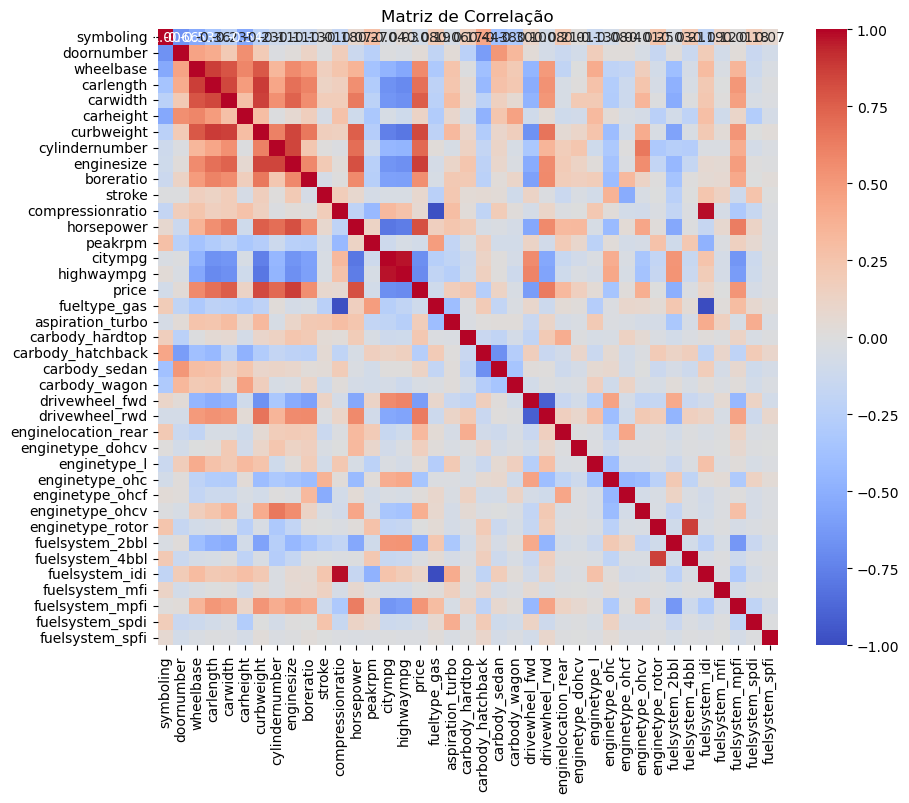

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

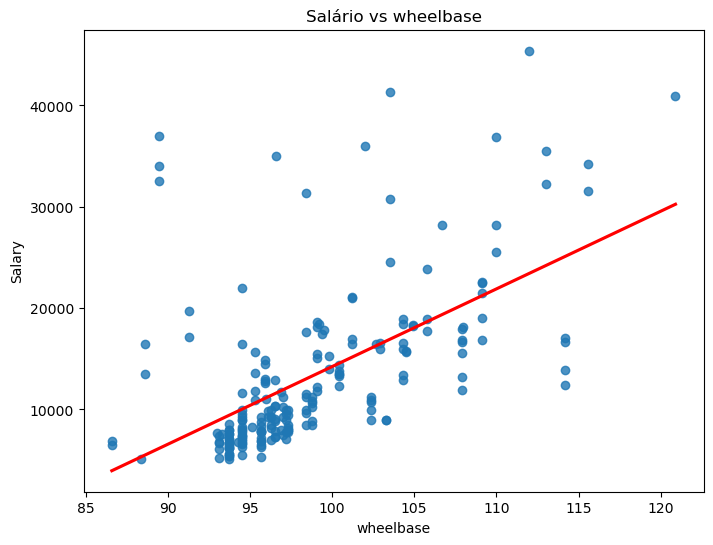

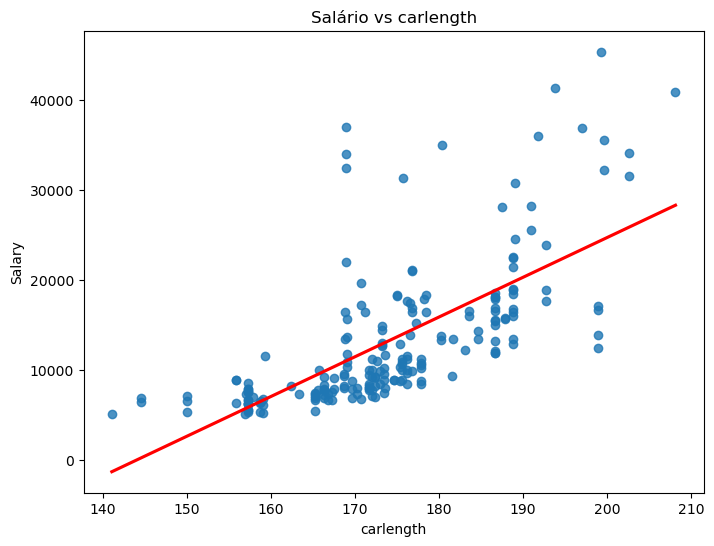

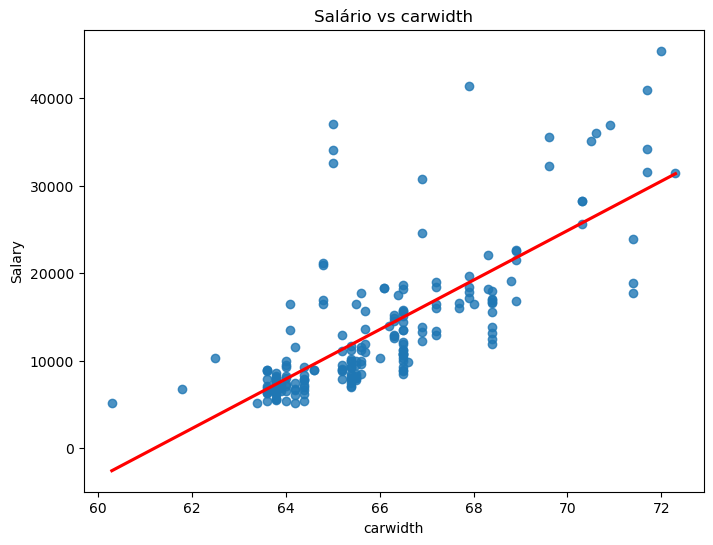

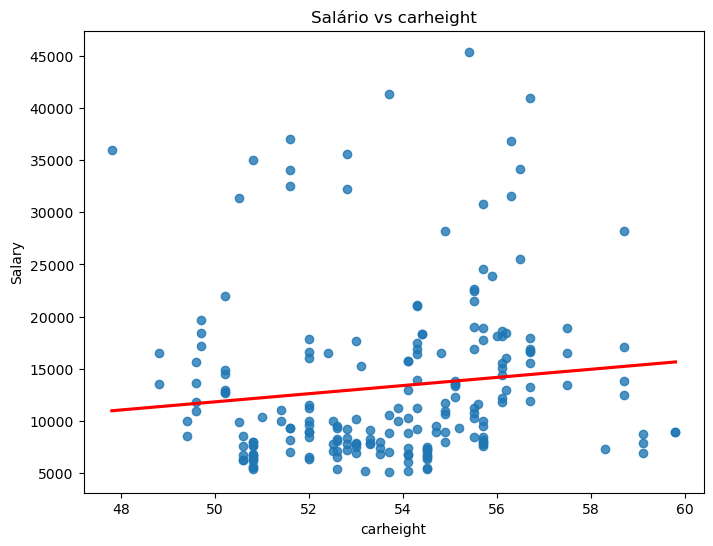

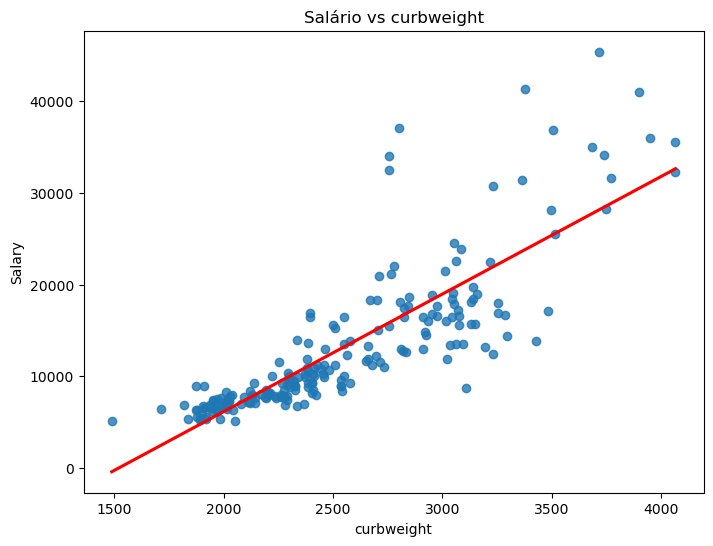

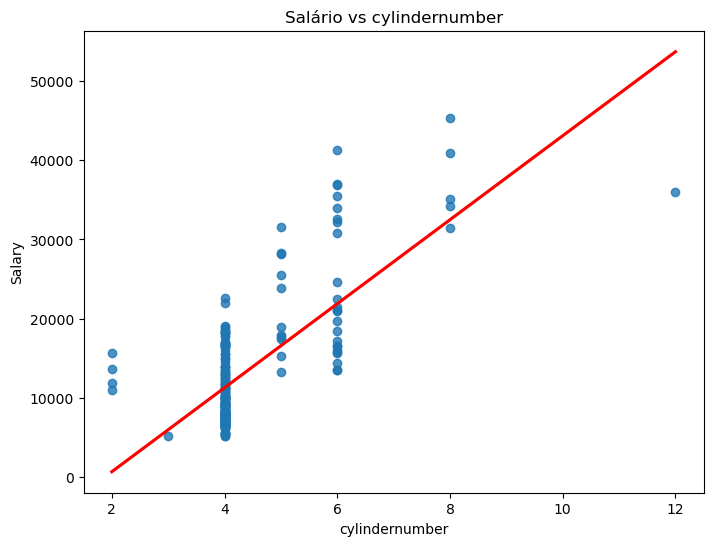

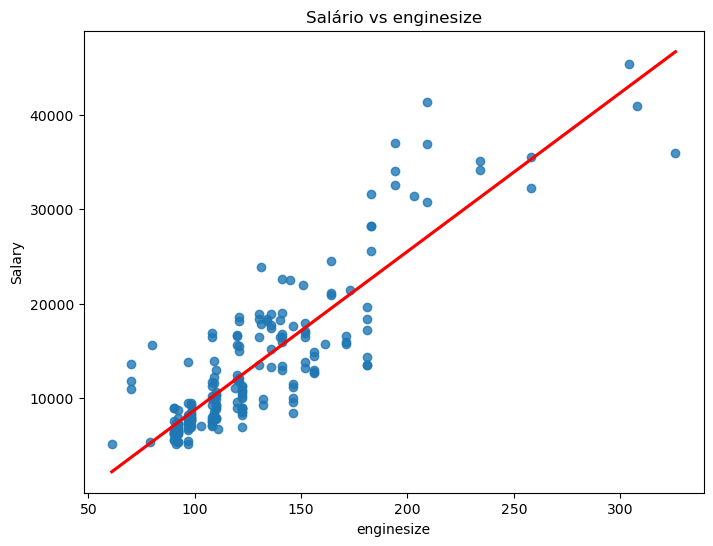

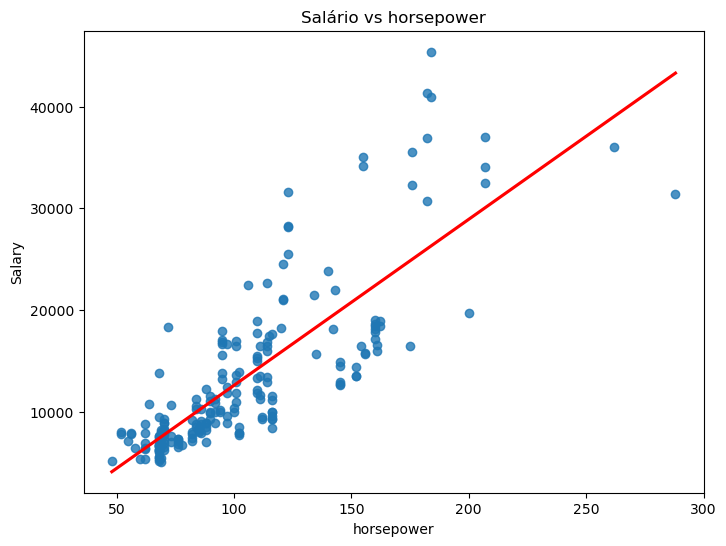

In [21]:
# Gráficos de dispersão para cada variável independente com alta taxa de correlação
features = ['wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize','horsepower']  # Substitua pelos nomes reais das colunas

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[feature], y=df_encoded['price'], ci=None, line_kws={"color": "red"})
    plt.title(f"Salário vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Salary")
    plt.show()

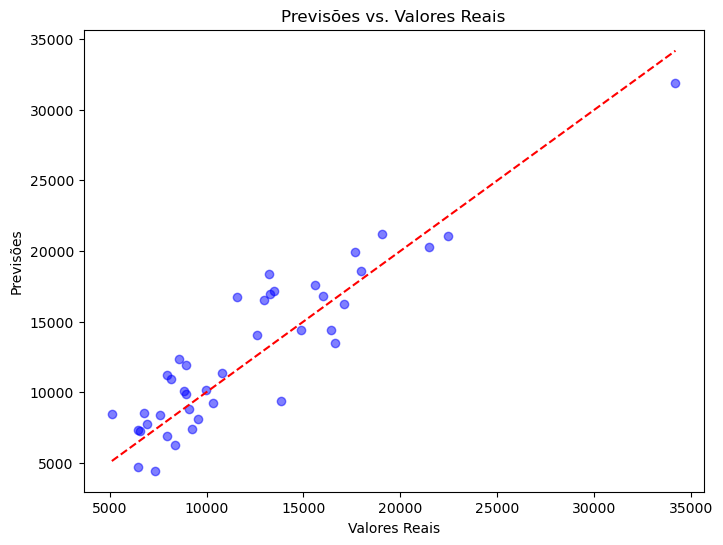

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Previsões vs. Valores Reais")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()